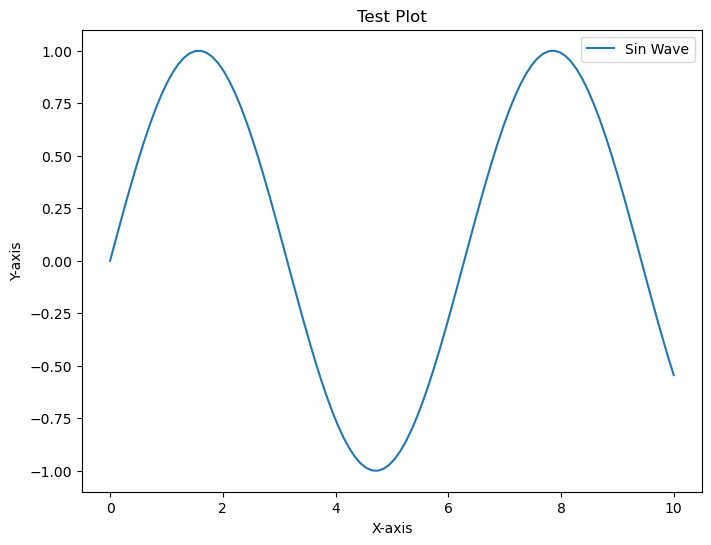

In [2]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 100)
y = np.sin(x)

plt.figure(figsize=(8, 6))
plt.plot(x, y, label="Sin Wave")
plt.title("Test Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.show()


In [4]:
import pandas as pd

# Load the dataset
file_path = r'C:\Users\Ommo Clark\Downloads\faithful.csv'  # Adjust the path if needed
data = pd.read_csv(file_path)

# Preview the data to confirm column order and names
print(data.head())
print(data.info())


   eruptions  waiting
0      3.600       79
1      1.800       54
2      3.333       74
3      2.283       62
4      4.533       85
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   eruptions  272 non-null    float64
 1   waiting    272 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 4.4 KB
None


In [6]:
# Drop the ID column (if it's the first column)
data_clean = data.iloc[:, 1:]  # Keep only eruption and waiting time columns


   eruptions  waiting
0      3.600       79
1      1.800       54
2      3.333       74
3      2.283       62
4      4.533       85


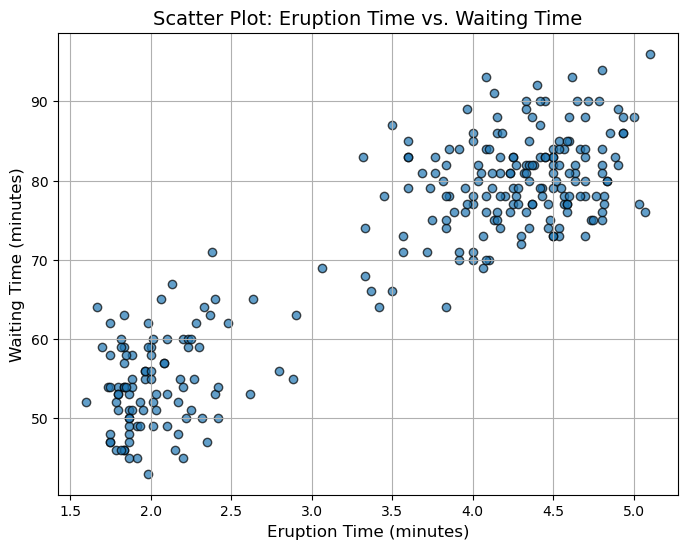

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from the specified file path
file_path = r"C:\Users\Ommo Clark\Downloads\faithful.csv"
data = pd.read_csv(file_path)

# Inspect the dataset structure (optional, for understanding)
print(data.head())

# Scatter plot: eruption time vs. waiting time
plt.figure(figsize=(8, 6))
plt.scatter(data['eruptions'], data['waiting'], alpha=0.7, edgecolors='k')
plt.title('Scatter Plot: Eruption Time vs. Waiting Time', fontsize=14)
plt.xlabel('Eruption Time (minutes)', fontsize=12)
plt.ylabel('Waiting Time (minutes)', fontsize=12)
plt.grid(True)
plt.show()


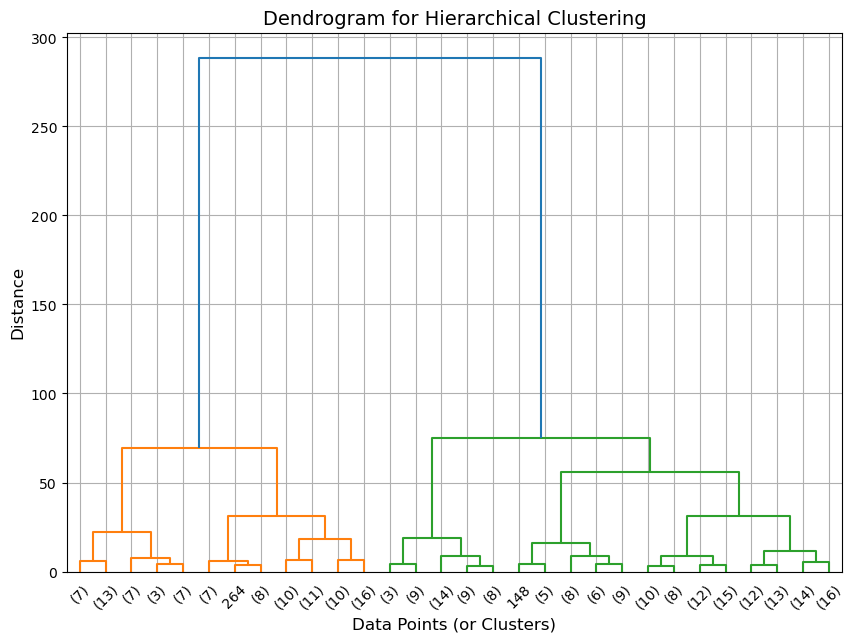

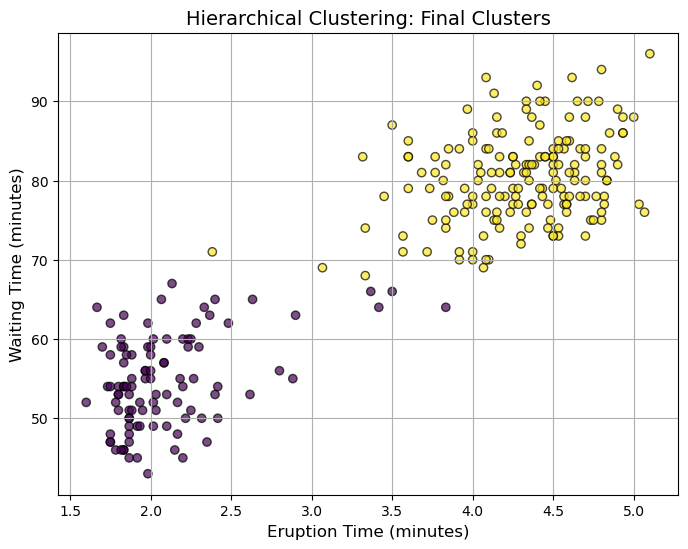

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Load the dataset
file_path = r"C:\Users\Ommo Clark\Downloads\faithful.csv"
data = pd.read_csv(file_path)

# Prepare the data: Use only the numeric columns (eruption and waiting times)
X = data[['eruptions', 'waiting']].values

# Step 1: Perform hierarchical clustering using the 'linkage' function
# Method can be 'single', 'complete', 'average', or 'ward' (Ward's method is common for Euclidean distances)
linkage_matrix = linkage(X, method='ward')

# Step 2: Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, truncate_mode='lastp', p=30, show_leaf_counts=True)
plt.title("Dendrogram for Hierarchical Clustering", fontsize=14)
plt.xlabel("Data Points (or Clusters)", fontsize=12)
plt.ylabel("Distance", fontsize=12)
plt.grid(True)
plt.show()

# Step 3: Extract clusters based on a distance threshold
# Choose the number of clusters by setting a distance threshold or cutting the dendrogram
distance_threshold = 100  # Adjust this value based on the dendrogram
clusters = fcluster(linkage_matrix, t=distance_threshold, criterion='distance')

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', edgecolors='k', alpha=0.7)
plt.title("Hierarchical Clustering: Final Clusters", fontsize=14)
plt.xlabel("Eruption Time (minutes)", fontsize=12)
plt.ylabel("Waiting Time (minutes)", fontsize=12)
plt.grid(True)
plt.show()


Iteration 1
Centroids:
[[ 4.1385873  78.81481481]
 [ 2.00583133 52.86746988]]
Objective Function Value: 11348.766822641295

Iteration 2
Centroids:
[[ 4.27568    80.04571429]
 [ 2.06631959 54.39175258]]
Objective Function Value: 9063.156122948925

Iteration 3
Centroids:
[[ 4.29793023 80.28488372]
 [ 2.09433    54.75      ]]
Objective Function Value: 8901.76872094721

Iteration 4
Centroids:
[[ 4.29793023 80.28488372]
 [ 2.09433    54.75      ]]
Objective Function Value: 8901.76872094721

Convergence reached!

Final Centroids:
[[ 4.29793023 80.28488372]
 [ 2.09433    54.75      ]]


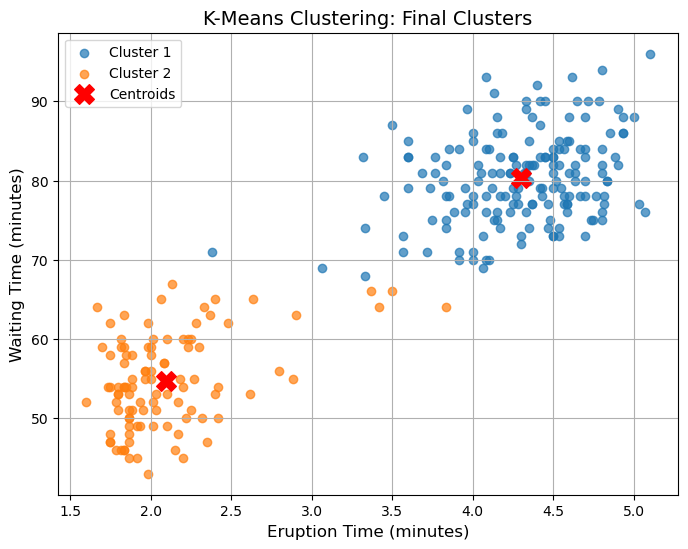

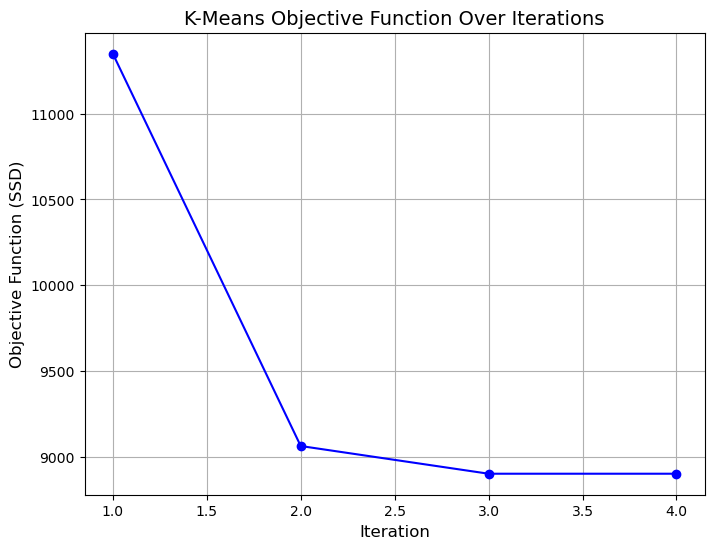

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = r"C:\Users\Ommo Clark\Downloads\faithful.csv"
data = pd.read_csv(file_path)

# Prepare the data
X = data[['eruptions', 'waiting']].values  # Use only eruption and waiting time

# K-means Algorithm Implementation
def k_means(X, k, max_iters=100, tol=1e-4):
    np.random.seed(42)  # For reproducibility
    
    # Step 1: Randomly initialize centroids
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    previous_centroids = centroids.copy()
    clusters = np.zeros(X.shape[0], dtype=int)  # Ensure integer type for indexing
    obj_function = []  # To store the objective function values

    for iteration in range(max_iters):
        print(f"Iteration {iteration + 1}")  # Display the iteration number
        
        # Step 2: Assign each data point to the nearest centroid
        for i, point in enumerate(X):
            distances = np.linalg.norm(point - centroids, axis=1)  # Euclidean distance
            clusters[i] = np.argmin(distances)  # Assign nearest centroid
        
        # Step 3: Recompute centroids as the mean of all points in each cluster
        for j in range(k):
            if np.sum(clusters == j) > 0:  # Avoid division by zero
                centroids[j] = X[clusters == j].mean(axis=0)
        
        # Compute the objective function (Sum of Squared Distances, SSD)
        ssd = sum(np.sum((X[clusters == j] - centroids[j])**2) for j in range(k))
        obj_function.append(ssd)
        
        print(f"Centroids:\n{centroids}")
        print(f"Objective Function Value: {ssd}\n")
        
        # Check for convergence (if centroids do not change significantly)
        if np.linalg.norm(centroids - previous_centroids) < tol:
            print("Convergence reached!\n")
            break
        
        previous_centroids = centroids.copy()
    
    return centroids, clusters, obj_function

# Run K-means for k=2
k = 2
centroids, clusters, obj_function = k_means(X, k)

# Final Output
print("Final Centroids:")
print(centroids)

# Plot the final clusters and centroids
plt.figure(figsize=(8, 6))
for cluster_id in range(k):
    cluster_points = X[clusters == cluster_id]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster_id+1}", alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering: Final Clusters', fontsize=14)
plt.xlabel('Eruption Time (minutes)', fontsize=12)
plt.ylabel('Waiting Time (minutes)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Plot the K-means objective function over iterations
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(obj_function) + 1), obj_function, marker='o', color='blue', linestyle='-')
plt.title('K-Means Objective Function Over Iterations', fontsize=14)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Objective Function (SSD)', fontsize=12)
plt.grid(True)
plt.show()


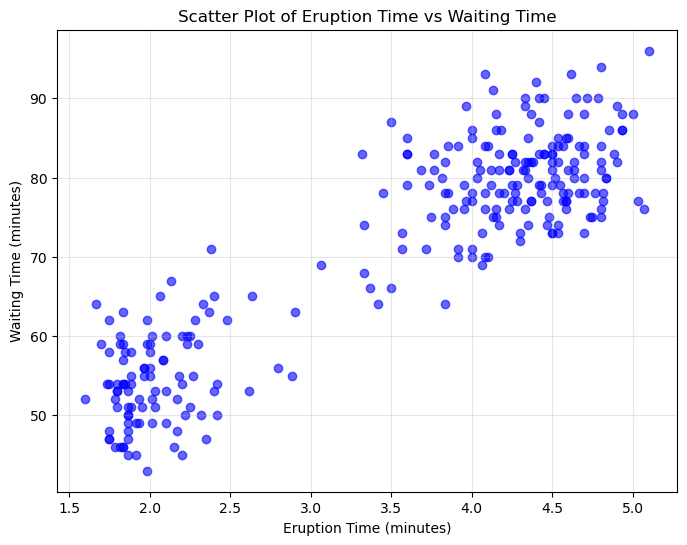


Hierarchical clustering builds a hierarchy of clusters. It can be divided into two types:
1. **Agglomerative (bottom-up)**: Starts with each data point as its own cluster and merges the closest clusters iteratively.
2. **Divisive (top-down)**: Starts with all data points in one cluster and splits them iteratively.

Steps for Agglomerative Clustering:
1. Compute a distance matrix for all data points.
2. Treat each data point as a single cluster.
3. Merge the closest two clusters based on the linkage criteria (e.g., single, complete, average linkage).
4. Update the distance matrix and repeat until all points are in one cluster.

The method is appropriate for the Old Faithful dataset because the data shows two visually distinct clusters. Hierarchical clustering can effectively capture this structure, particularly with the correct linkage method.



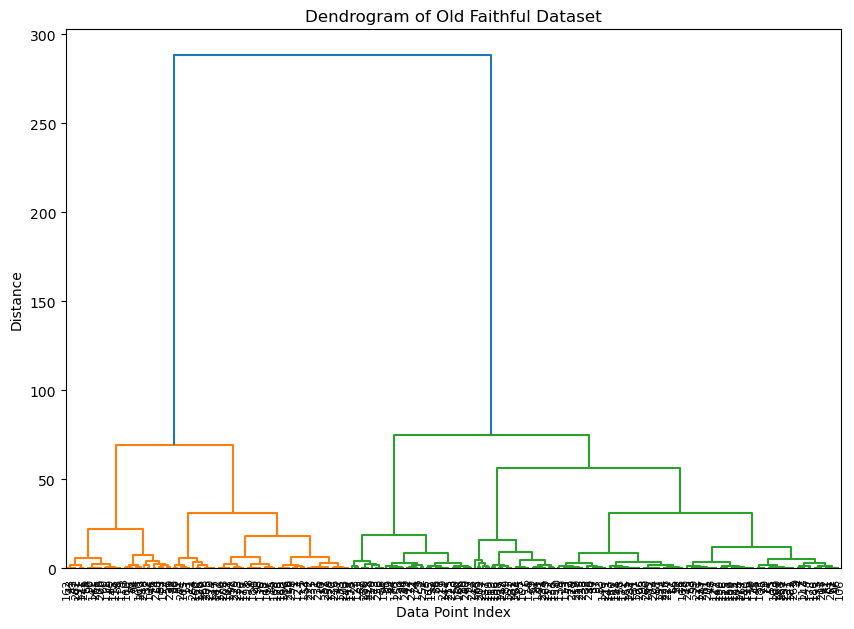

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the dataset
file_path = r"C:\Users\Ommo Clark\Downloads\faithful.csv"
data = pd.read_csv(file_path)

# Scatter plot of eruption vs. waiting time
plt.figure(figsize=(8, 6))
plt.scatter(data['eruptions'], data['waiting'], c='blue', alpha=0.6)
plt.title("Scatter Plot of Eruption Time vs Waiting Time")
plt.xlabel("Eruption Time (minutes)")
plt.ylabel("Waiting Time (minutes)")
plt.grid(alpha=0.3)
plt.show()

# Hierarchical clustering description
description = """
Hierarchical clustering builds a hierarchy of clusters. It can be divided into two types:
1. **Agglomerative (bottom-up)**: Starts with each data point as its own cluster and merges the closest clusters iteratively.
2. **Divisive (top-down)**: Starts with all data points in one cluster and splits them iteratively.

Steps for Agglomerative Clustering:
1. Compute a distance matrix for all data points.
2. Treat each data point as a single cluster.
3. Merge the closest two clusters based on the linkage criteria (e.g., single, complete, average linkage).
4. Update the distance matrix and repeat until all points are in one cluster.

The method is appropriate for the Old Faithful dataset because the data shows two visually distinct clusters. Hierarchical clustering can effectively capture this structure, particularly with the correct linkage method.
"""

print(description)

# Dendrogram for hierarchical clustering
linked = linkage(data[['eruptions', 'waiting']], method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, labels=data.index, leaf_rotation=90, leaf_font_size=8)
plt.title("Dendrogram of Old Faithful Dataset")
plt.xlabel("Data Point Index")
plt.ylabel("Distance")
plt.show()


In [3]:
import os
os.environ["OMP_NUM_THREADS"] = "2"  # Avoid memory leak on Windows with MKL

from sklearn.cluster import KMeans

# K-means clustering with n_init explicitly set
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)


In [5]:
pip install pandas numpy matplotlib scikit-learn


C:\Users\Ommo Clark\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


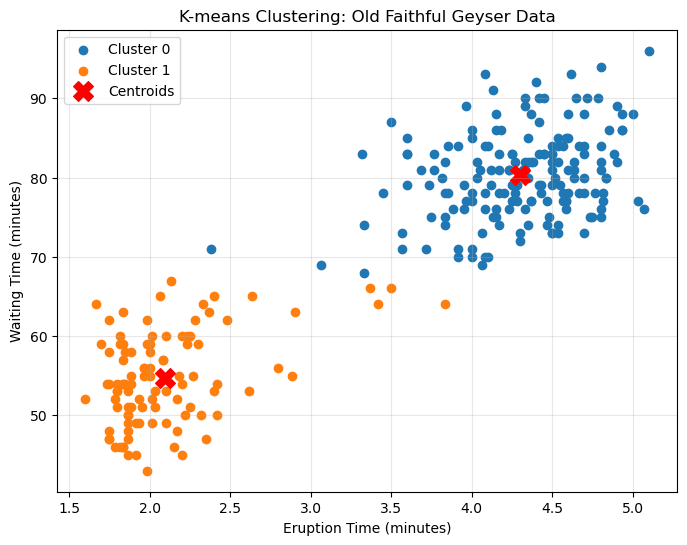

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the dataset
file_path = r"C:\Users\Ommo Clark\Downloads\faithful.csv"
data = pd.read_csv(file_path)

# Extract relevant features
X = data[['eruptions', 'waiting']]

# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

# Scatter plot with cluster color coding
plt.figure(figsize=(8, 6))
for cluster in np.unique(data['Cluster']):
    cluster_points = data[data['Cluster'] == cluster]
    plt.scatter(cluster_points['eruptions'], cluster_points['waiting'], label=f'Cluster {cluster}')

# Add cluster centers to the plot
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')

# Label the plot
plt.title("K-means Clustering: Old Faithful Geyser Data")
plt.xlabel("Eruption Time (minutes)")
plt.ylabel("Waiting Time (minutes)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


Initialization complete
Iteration 0, inertia 18824.042019.
Initialization complete
Iteration 0, inertia 10294.903734.
Initialization complete
Iteration 0, inertia 10385.685657000005.
Initialization complete
Iteration 0, inertia 12076.213730000001.
Initialization complete
Iteration 0, inertia 9827.682301000004.
Initialization complete
Iteration 0, inertia 10639.903734.
Initialization complete
Iteration 0, inertia 13467.629808000005.
Initialization complete
Iteration 0, inertia 9680.550600999999.
Initialization complete
Iteration 0, inertia 22322.072312999997.
Initialization complete
Iteration 0, inertia 13978.356658.
Initialization complete
Iteration 0, inertia 18824.042019.
Iteration 1, inertia 9792.41679809422.
Initialization complete
Iteration 0, inertia 10294.903734.
Iteration 1, inertia 8925.715281184828.
Initialization complete
Iteration 0, inertia 10385.685657000005.
Iteration 1, inertia 8924.605200606597.
Initialization complete
Iteration 0, inertia 12076.213730000001.
Iteration

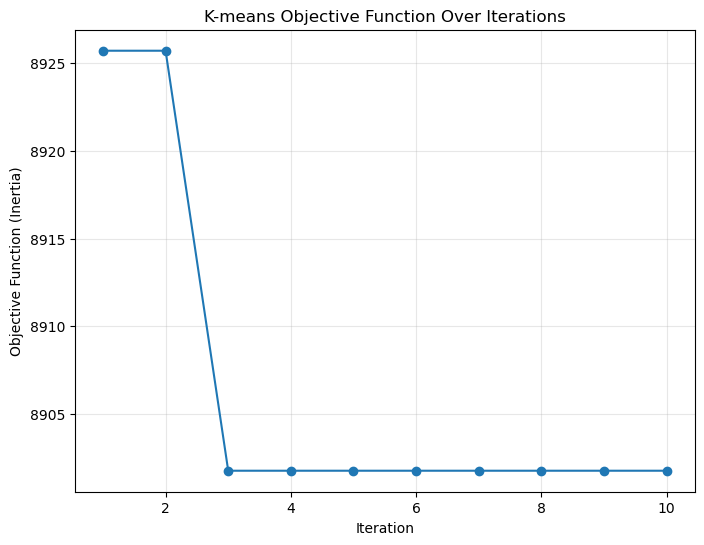

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the dataset
file_path = r"C:\Users\Ommo Clark\Downloads\faithful.csv"
data = pd.read_csv(file_path)

# Extract relevant features
X = data[['eruptions', 'waiting']]

# Perform K-means clustering with tracking of inertia (objective function)
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10, max_iter=10, tol=1e-4, verbose=1)

# Store inertia at each iteration
inertia_values = []
for i in range(1, 11):  # Max iterations
    kmeans.set_params(max_iter=i)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Plot the objective function
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia_values, marker='o', linestyle='-')
plt.title("K-means Objective Function Over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Objective Function (Inertia)")
plt.grid(alpha=0.3)
plt.show()


In [11]:
pip install pandas numpy matplotlib scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [13]:
import os
os.environ["OMP_NUM_THREADS"] = "2"  # Avoid memory leak on Windows with MKL

from sklearn.cluster import KMeans

# K-means clustering with n_init explicitly set
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)


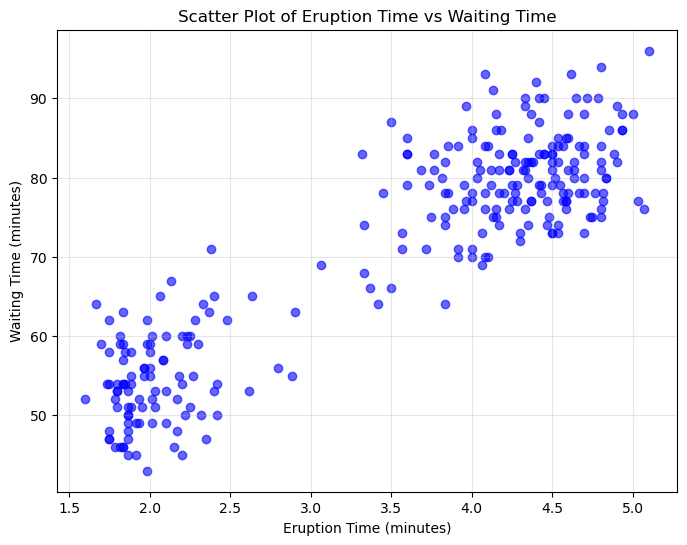

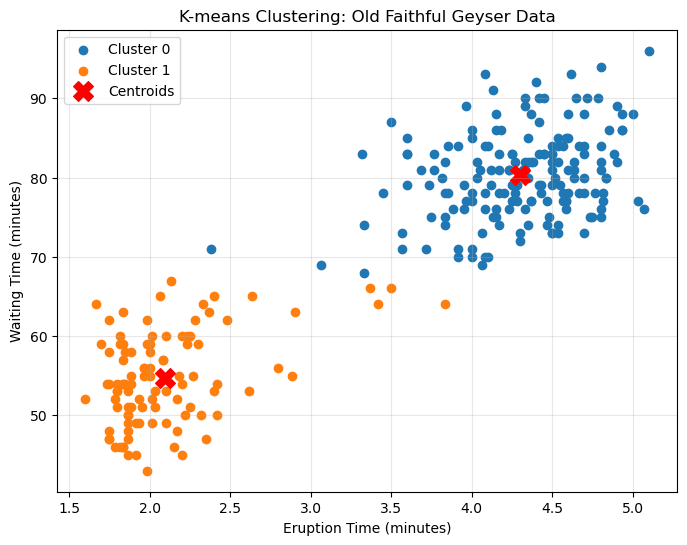

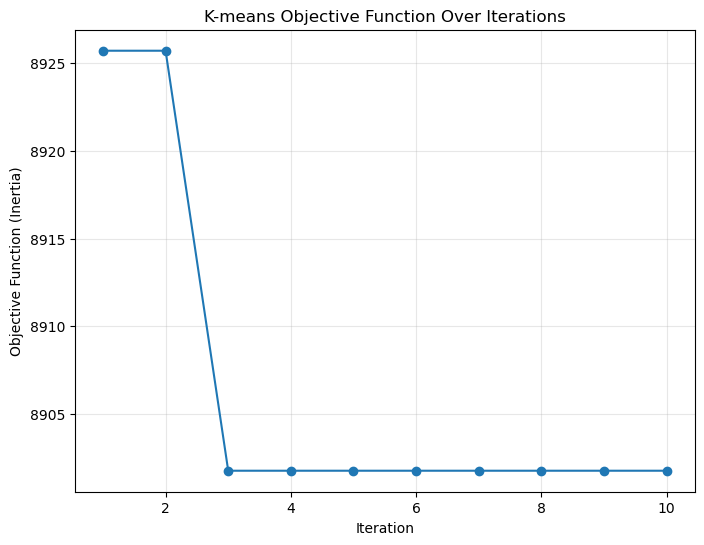


**Narrative Explanation:**

1. **Scatter Plot of Eruption vs. Waiting Time:**
   This plot shows the original dataset with no clustering. It visually indicates the presence of two clusters.

2. **Scatter Plot with Clusters and Centroids:**
   The scatter plot highlights two distinct clusters identified by the K-means algorithm. The cluster centroids are marked with red X markers, showing their locations in the feature space. The clusters align well with the visual patterns in the data.

3. **K-means Objective Function:**
   The objective function (inertia) decreases consistently over iterations, indicating convergence of the K-means algorithm. The steep drop in early iterations suggests significant improvement, followed by stabilization as the algorithm converges.

These visualizations provide strong evidence of the clustering patterns in the data and the effectiveness of the K-means algorithm in identifying meaningful groups.



In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the dataset
file_path = r"C:\Users\Ommo Clark\Downloads\faithful.csv"
data = pd.read_csv(file_path)

# Extract relevant features
X = data[['eruptions', 'waiting']]

# Perform K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
data['Cluster'] = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_

# Plot 1: Scatter plot of eruption vs. waiting time
plt.figure(figsize=(8, 6))
plt.scatter(data['eruptions'], data['waiting'], c='blue', alpha=0.6)
plt.title("Scatter Plot of Eruption Time vs Waiting Time")
plt.xlabel("Eruption Time (minutes)")
plt.ylabel("Waiting Time (minutes)")
plt.grid(alpha=0.3)
plt.show()

# Plot 2: Scatter plot with clusters and centroids
plt.figure(figsize=(8, 6))
for cluster in np.unique(data['Cluster']):
    cluster_points = data[data['Cluster'] == cluster]
    plt.scatter(cluster_points['eruptions'], cluster_points['waiting'], label=f'Cluster {cluster}')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title("K-means Clustering: Old Faithful Geyser Data")
plt.xlabel("Eruption Time (minutes)")
plt.ylabel("Waiting Time (minutes)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Track inertia (objective function) for K-means
inertia_values = []
for i in range(1, 11):  # 10 iterations
    kmeans_iter = KMeans(n_clusters=2, random_state=42, n_init=10, max_iter=i)
    kmeans_iter.fit(X)
    inertia_values.append(kmeans_iter.inertia_)

# Plot 3: K-means objective function over iterations
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia_values, marker='o', linestyle='-')
plt.title("K-means Objective Function Over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Objective Function (Inertia)")
plt.grid(alpha=0.3)
plt.show()

# Narrative discussing the visualizations
narrative = """
**Narrative Explanation:**

1. **Scatter Plot of Eruption vs. Waiting Time:**
   This plot shows the original dataset with no clustering. It visually indicates the presence of two clusters.

2. **Scatter Plot with Clusters and Centroids:**
   The scatter plot highlights two distinct clusters identified by the K-means algorithm. The cluster centroids are marked with red X markers, showing their locations in the feature space. The clusters align well with the visual patterns in the data.

3. **K-means Objective Function:**
   The objective function (inertia) decreases consistently over iterations, indicating convergence of the K-means algorithm. The steep drop in early iterations suggests significant improvement, followed by stabilization as the algorithm converges.

These visualizations provide strong evidence of the clustering patterns in the data and the effectiveness of the K-means algorithm in identifying meaningful groups.
"""
print(narrative)
